# Exploring Inner Membrane Proteins in Mass Spec Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import size.viz
cor, pal = size.viz.matplotlib_style()

In [13]:
# Load the compiled mass fraction data
data = pd.read_csv('../../data/compiled_mass_fractions.csv')

# Assign new go terms
go_dict = {'inner membrane (periplasm)': ['GO:0009897'],
           'inner membrane': ['GO:0005886', 'GO:0005887', 'GO:0005904'],
           'outer membrane': ['GO:0009279'],
           'outer membrane (periplasm)': ['GO:0031241'],
           'periplasmic space': ['GO:0042597', 'GO:0005620'],
           }
data['region'] = 'other'
for k, v in go_dict.items():
    for _v in v:
        data.loc[data['go_terms'].str.contains(_v), 'region'] =  k

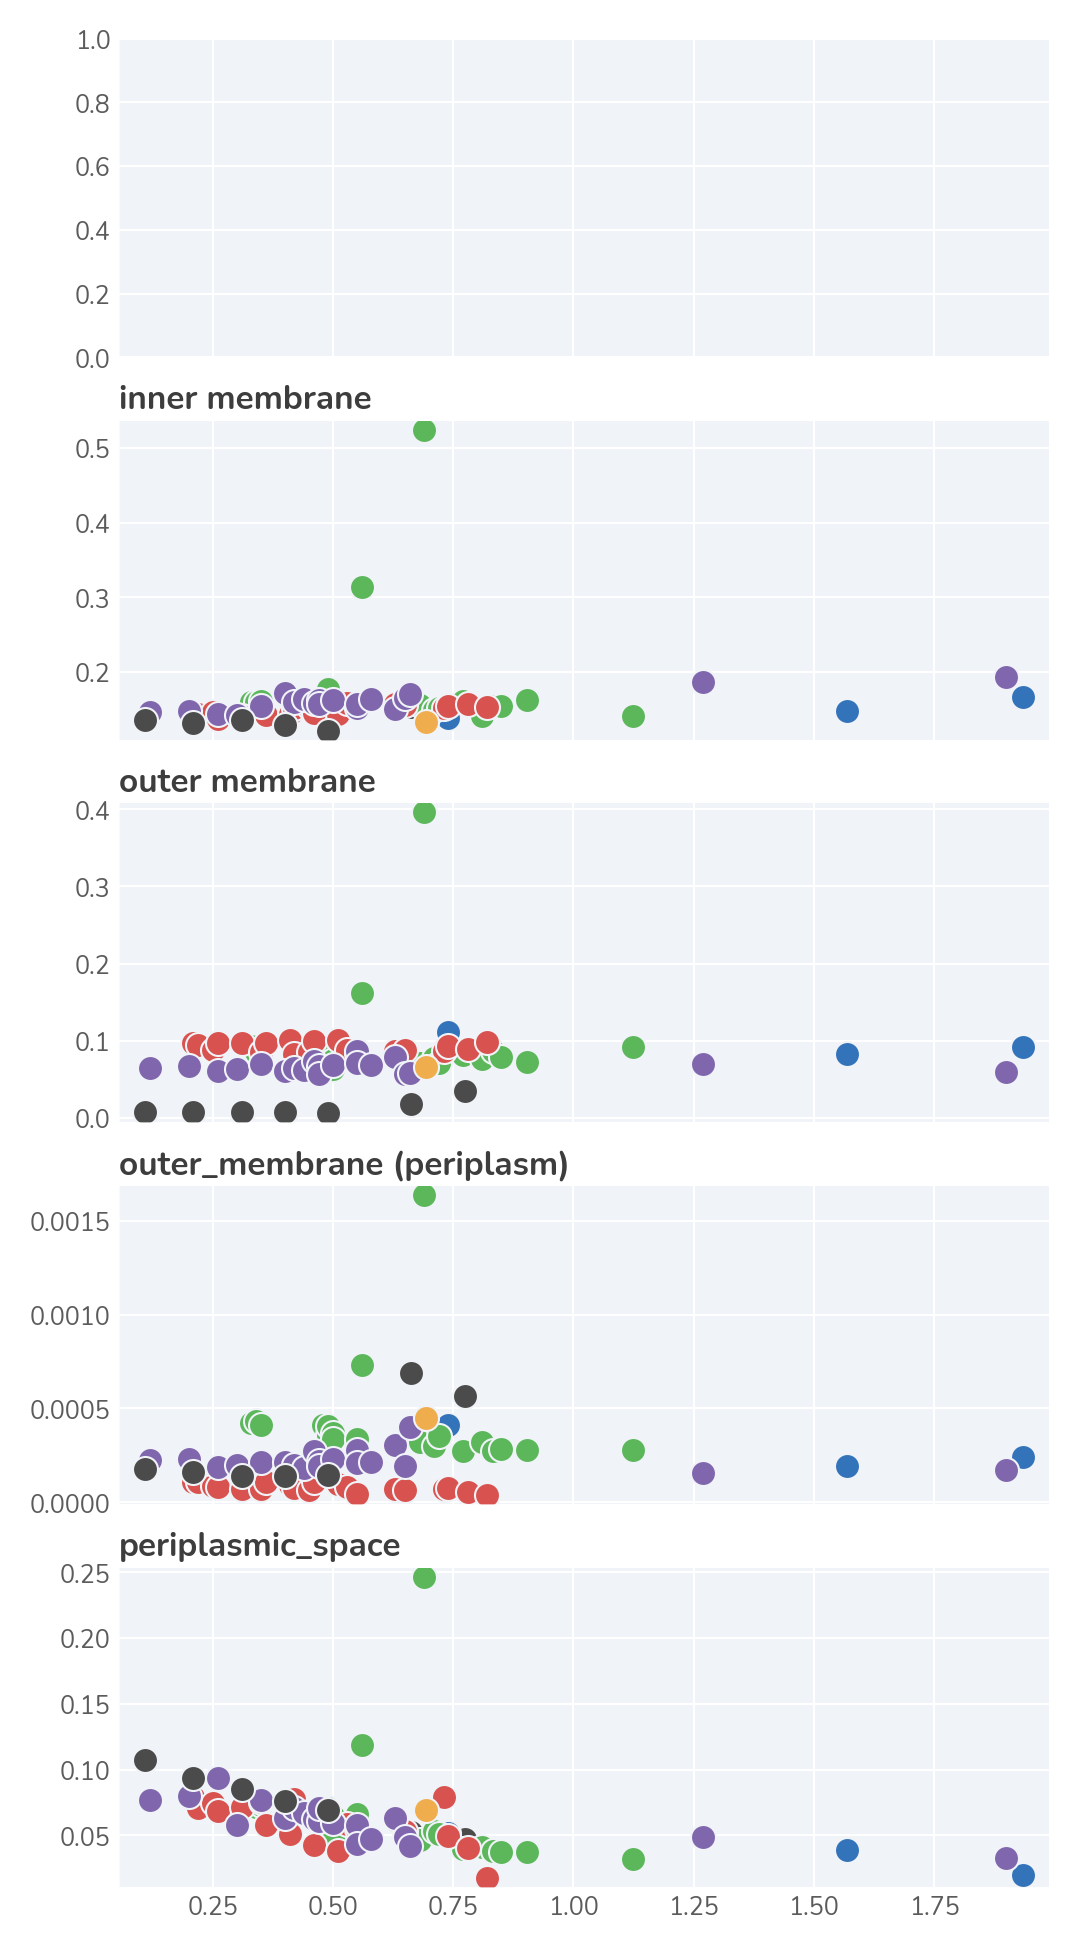

In [19]:
fig, ax = plt.subplots(5, 1, figsize=(4, 8), sharex=True, sharey=True)

go_idx = {k:v for k,v in zip(list(go_dict.keys()), np.arange(len(go_dict)))}
go_idx['other'] = -1
for i, (g, d) in enumerate(data.groupby(['region', 'dataset_name'])):
    if g[0] == 'other':
        continue
    summed = d.groupby(['growth_rate_hr', 'condition'])['mass_frac'].sum().reset_index()
    ax[go_idx[g[0]]].plot(summed['growth_rate_hr'], summed['mass_frac'], 'o')
    ax[go_idx[g[0]]] .set_title(g[0])   




In [17]:
go_idx

{'inner membrane (periplasm)': 0,
 'inner membrane': 1,
 'outer membrane': 2,
 'outer_membrane (periplasm)': 3,
 'periplasmic_space': 4,
 'other': -1}

In [29]:
data[(data['region']=='inner membrane') & (data['dataset_name']=='Li et al. 2014') & (data['condition']=='MOPS complete')].sort_values(by='mass_frac', ascending=False).head(50)

,gene_name,mass_frac,condition,strain,growth_rate_hr,dataset_name,go_terms,cog_class,cog_letter,periplasm,region
62025,tufB,0.030586,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:0003723; GO:0005515; GO:0003924; GO:0005829...,information storage and processing,J,False,inner membrane
62024,tufA,0.030565,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:0003723; GO:0003924; GO:0005829; GO:0005886...,information storage and processing,J,False,inner membrane
60434,dnaK,0.007515,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:1903507; GO:0051787; GO:0042623; GO:0042026...,cellular processes and signaling,O,False,inner membrane
61029,lpdA,0.005547,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:0005623; GO:0022900; GO:0009055; GO:0006979...,metabolism,C,False,inner membrane
60156,atpA,0.004134,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:1902600; GO:0043531; GO:0032559; GO:0046034...,metabolism,C,False,inner membrane
60159,atpD,0.003756,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:1902600; GO:0016020; GO:0046034; GO:0015986...,metabolism,C,False,inner membrane
60534,fbaA,0.002541,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:0042802; GO:0006094; GO:0005886; GO:0042803...,metabolism,G,False,inner membrane
60340,cyoB,0.002540,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:0004129; GO:0005515; GO:0055114; GO:0046872...,metabolism,C,False,inner membrane
60160,atpE,0.002275,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:1902600; GO:0033177; GO:0016020; GO:0015078...,metabolism,C,False,inner membrane
62479,yeeF,0.002188,MOPS complete,MG1655,1.934364,Li et al. 2014,GO:0055085; GO:0022857; GO:1902600; GO:0006865...,metabolism,E,False,inner membrane
